# Using K-means Clustering Technique on Mall Customers dataset to segment      customers based on Annual income and Spending Score

In [1]:
import pandas as pd #importing the pandas as library for reading the Dataset
import matplotlib.pyplot as plt #matplotlib Library for Data Visualization
import seaborn as sns #importing seaborn library for statistical graphs
import plotly.express as px
from IPython.display import Image  #importing image library used for image processing tasks
from sklearn.cluster import KMeans #importing Classification Clustering Technique
from sklearn.metrics import silhouette_score #Importing the Evaluation Metric from sklearn library
%matplotlib inline

# Working with datasets

In [13]:
df = pd.read_csv("/content/Mall_Customers.csv")# Reading the dataset using pandas library
df.head()#Displaying the Top 5 Rows

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
df.describe()#Description of data in the dataframe df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [15]:
df.info()#Displaying information of data in the dataframe like non-null counting and Datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [16]:
mask = df['Spending Score (1-100)'] >50#Condition checking which greaterthan 50
df_score = df[mask]
df_score.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,21,15,81
3,4,Female,23,16,77
5,6,Female,22,17,76
7,8,Female,23,18,94
9,10,Female,30,19,72


In [17]:
df_score.describe()#Describing data in dataframe like mean,count,standard deviation,min and max.

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,97.000000,97.000000,97.000000,97.000000
mean,100.298969,34.597938,60.412371,71.670103
std,59.122783,13.024544,26.756133,14.710910
min,2.000000,18.000000,15.000000,51.000000
25%,51.000000,26.000000,42.000000,57.000000
50%,96.000000,31.000000,60.000000,73.000000
75%,152.000000,38.000000,78.000000,85.000000
max,200.000000,70.000000,137.000000,99.000000


# Displaying Histogram on  the Age,Annual Income and Spending Score

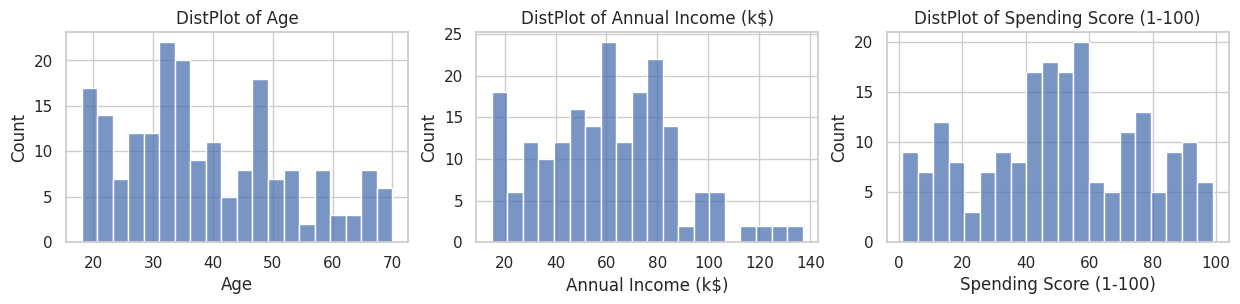

In [18]:
plt.figure(figsize = (15,6))#It displays with width 15 and height 6.
n=0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n += 1
    plt.subplot(2,3,n)#Here Dividing current figure into 2-by-3 grid and create axes in position specified by n.
    plt.subplots_adjust(hspace=0.2,wspace = 0.2)
    sns.histplot(df[x],bins = 20)
    plt.title('DistPlot of {}'.format(x))
plt.show();#Displaying the Age,Annual income and Spending score

# Histogram on Age Distribution Visualization

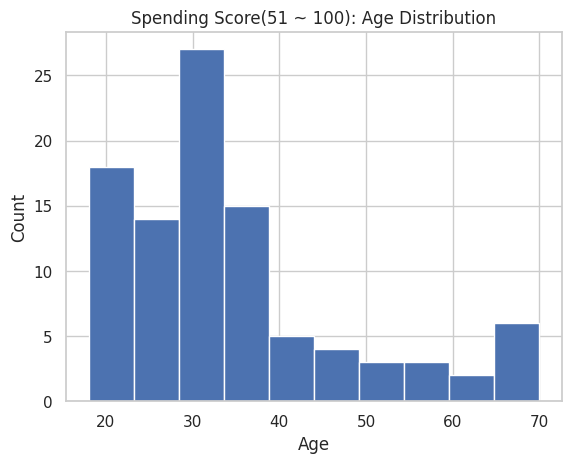

In [19]:
df_score['Age'].hist()#Creating the Histogram for grapgical representation of Age disribution
plt.xlabel('Age')#For x-axis It is Age
plt.ylabel('Count')#For y-axis It is Count
plt.title('Spending Score(51 ~ 100): Age Distribution');#Title of the Histogram Graph

# Histogram on Gender(male & female) Distribution Visualization

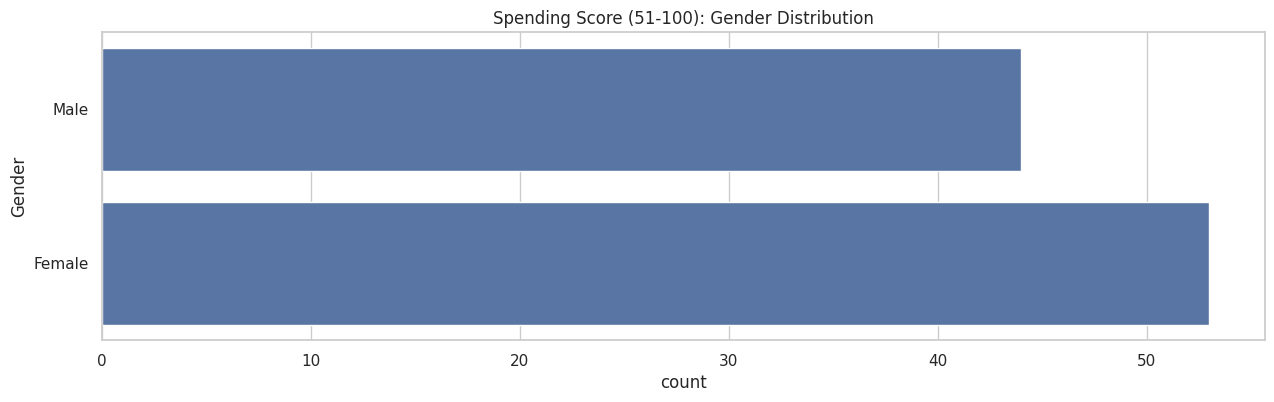

In [20]:
plt.figure(figsize = (15,4))#It Displays with width 15 and height 4.
sns.countplot(y='Gender',data = df_score)#It counts no of observations in each category using bars.
plt.title('Spending Score (51-100): Gender Distribution')#Here male and Female with their Corresponding Count.
plt.show();

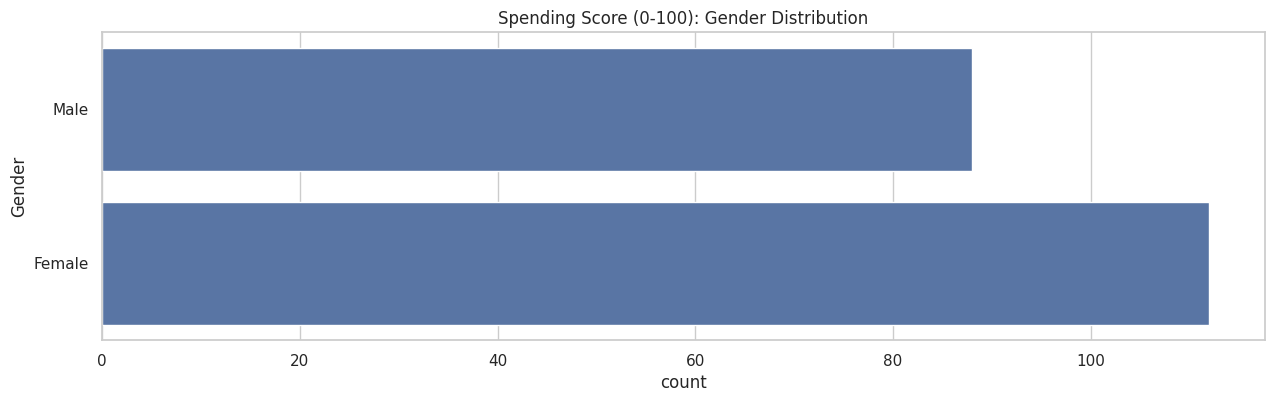

In [21]:
plt.figure(figsize = (15,4))#It Displays with width 15 and height 4.
sns.countplot(y='Gender',data = df)#It counts no of observations in each category using bars.x-denotes Count and Y-denotes Gender
plt.title('Spending Score (0-100): Gender Distribution')
plt.show();

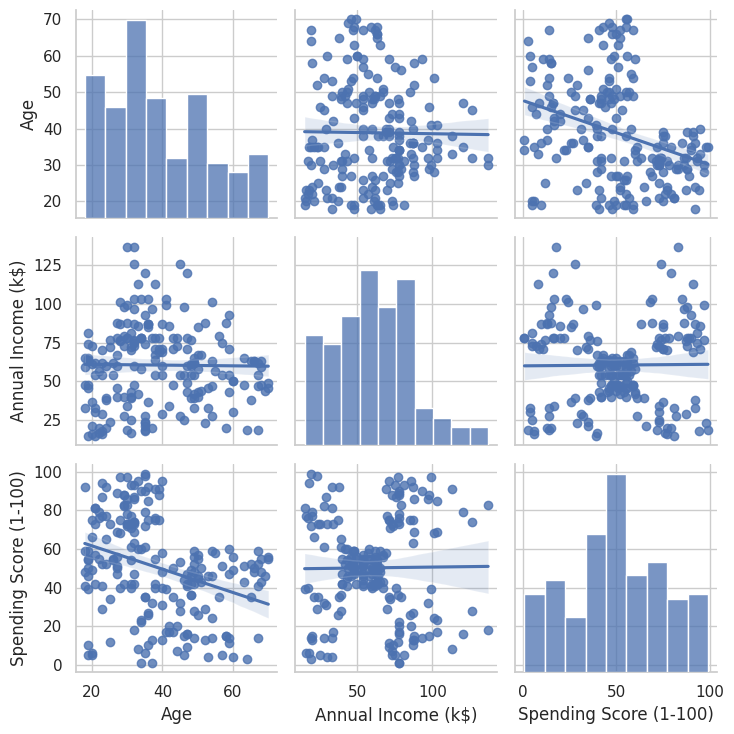

In [22]:
import warnings#Warnings are imported to messages about errors and anomalies in the Graphs.
warnings.filterwarnings("ignore",category =UserWarning)
sns.pairplot(df[['Age','Annual Income (k$)','Spending Score (1-100)']],kind='reg')#This pairplot helps in shows only the columns which hold numeric value.
plt.tight_layout()#this automatically adjusts the subplot parameters to give specified padding.
plt.show();

# Scatter plot on Age versus Annual income wtr Gender(male & female)

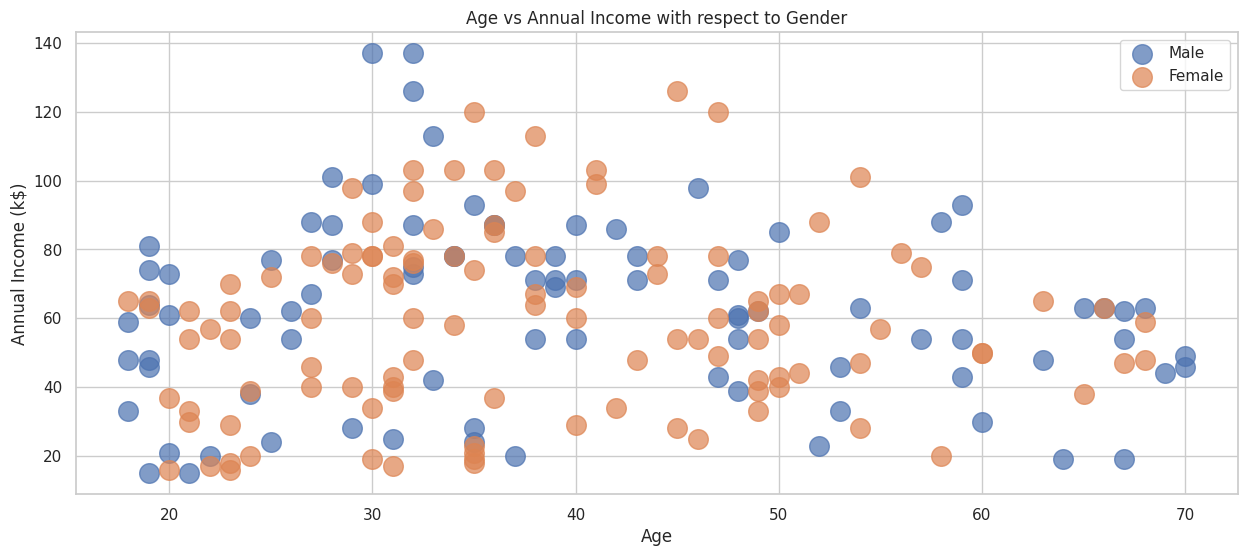

In [23]:
plt.figure(1,figsize = (15,6))#It Displays with width 15 and height 6.
for gender in ['Male','Female']:
    plt.scatter(x = 'Age',y = 'Annual Income (k$)',data =df[df['Gender'] == gender],s = 200,alpha = 0.7,label = gender)#Using Scatter plot to represent data in dot(.)
plt.xlabel('Age'),plt.ylabel('Annual Income (k$)')#where x-axis is Age and Y-axis is Annual Income.
plt.title('Age vs Annual Income with respect to Gender')
plt.legend()#Adding legends to the plot
plt.show()

# Scatter plot on Annual income versus Spending score wtr Gender

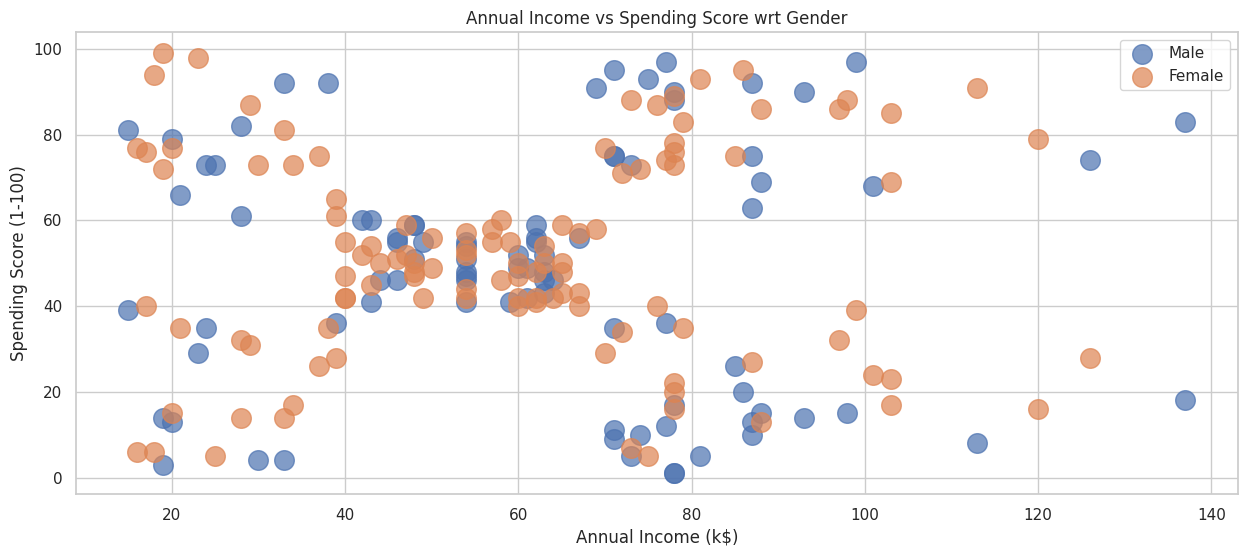

In [24]:
plt.figure(1,figsize = (15,6))#It Displays with width 15 and height 6.
for gender in ['Male','Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',data =df[df['Gender'] == gender],s = 200,alpha = 0.7,label = gender)#Using Scatter plot to represent data in dot(.)
plt.xlabel('Annual Income (k$)'),plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score wrt Gender')
plt.legend()
plt.show()

# Visualization of Age,Annual income and Spending score by Boxplot and              Swarm plot

<ipython-input-25-a7621b8667a8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = cols,y = 'Gender',data = df,palette = 'vlag')#used to statistical representation  of numeric data.
<ipython-input-25-a7621b8667a8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = cols,y = 'Gender',data = df,palette = 'vlag')#used to statistical representation  of numeric data.
<ipython-input-25-a7621b8667a8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = cols,y = 'Gender',data = df,palette = 'vlag')#used to statistical representation  of 

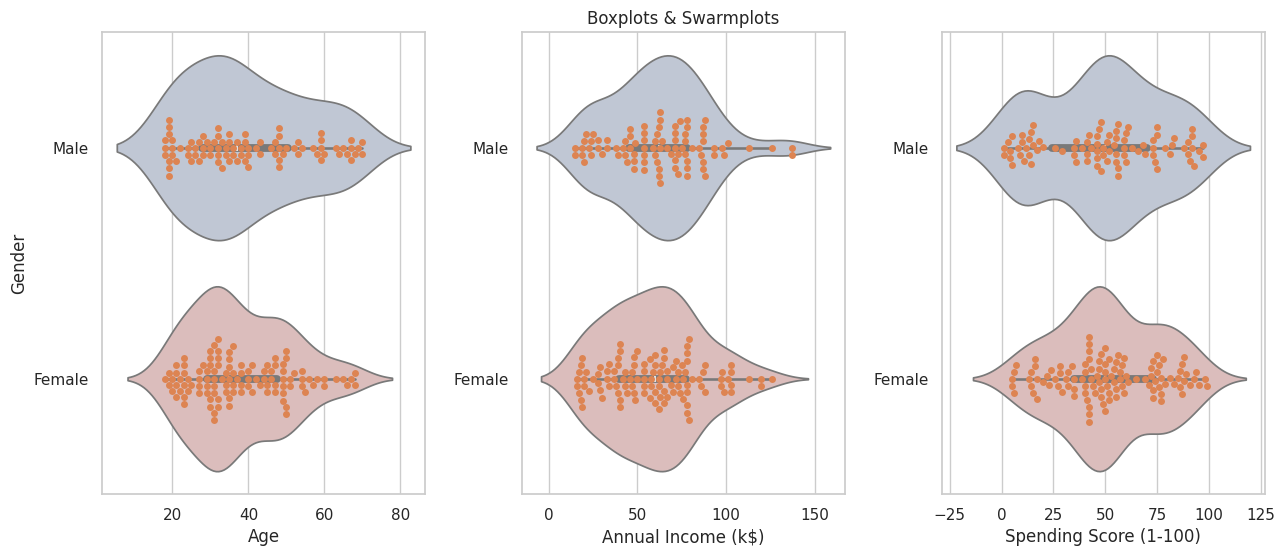

In [25]:
plt.figure(1,figsize = (15,6))#It Displays with width 15 and height 6.
n = 0
for cols in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n += 1
    plt.subplot(1,3,n)#Here Dividing current figure into 1-by-3 grid and create axes in position specified by n.
    plt.subplots_adjust(hspace = 0.3,wspace = 0.3)
    sns.violinplot(x = cols,y = 'Gender',data = df,palette = 'vlag')#used to statistical representation  of numeric data.
    sns.swarmplot(x = cols,y = 'Gender',data = df)#it displays the non-overlapping scatter plot.This plot draw on its own.
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show();

In [26]:
X = df.iloc[:,[3,4]]#Selecting the 3rd and 4th columns
print(f"X Shape {X.shape}")#Displays the number of rows and columns
X.head()#Top 5 rows will be displayed

X Shape (200, 2)


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# importing k-means cluster model with predefined  no of clusters

In [27]:
n_clusters = range(2,13)
inertia_errors = []
silhouette_scores = []
#Add a for loop to train model and calculate inertia,silhouette score.
for k in n_clusters:
    model = KMeans(n_clusters = k,random_state=42,n_init=10)#k defines the no of clusters
    #Train Model
    model.fit(X)#Fitting the model
    #Calculate Inertia
    inertia_errors.append(model.inertia_)
    #Calculate Silhouette Score
    silhouette_scores.append(silhouette_score(X,model.labels_))
print("Inertia:",inertia_errors[:3])
print()
print("Silhouette Scores:",silhouette_scores[:3])

Inertia: [181363.59595959607, 106348.37306211119, 73679.78903948837]

Silhouette Scores: [0.2968969162503008, 0.46761358158775435, 0.4931963109249047]


# line plot for inertia versus no of Clusters

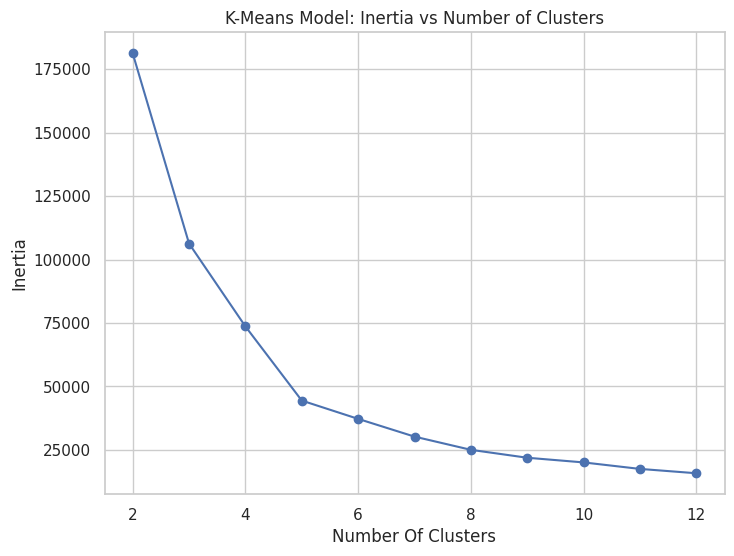

In [28]:
#Create a line plot of inertia_errors vs n_clusters
x_values = list(range(2, 13))

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  # Set Seaborn style

# Create a line plot using Matplotlib
plt.plot(x_values, inertia_errors, marker='o', linestyle='-', color='b')

# Add labels and title
plt.title('K-Means Model: Inertia vs Number of Clusters')
plt.xlabel('Number Of Clusters')
plt.ylabel('Inertia')

# Turn on grid and show plot
plt.grid(True)
plt.show()

# line plot for Silhouette scores versus no of Clusters

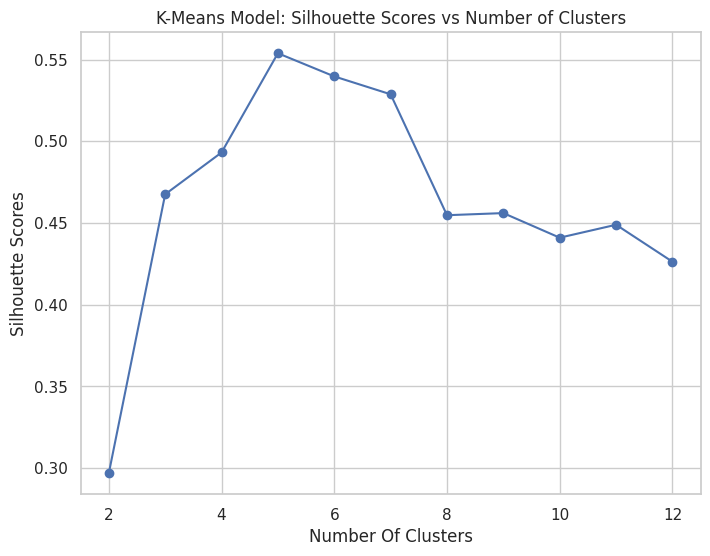

In [29]:
#Create a line plot of silhouette scores vs n_clusters
x_values = list(range(2, 13))

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  # Set Seaborn style

# Create a line plot using Matplotlib
plt.plot(x_values, silhouette_scores, marker='o', linestyle='-', color='b')

# Add labels and title
plt.title('K-Means Model: Silhouette Scores vs Number of Clusters')
plt.xlabel('Number Of Clusters')
plt.ylabel('Silhouette Scores')

# Turn on grid and show plot
plt.grid(True)
plt.show()


In [30]:
final_model = KMeans(n_clusters=5,random_state=42,n_init=10)#Grouping into 5 clusters wih random selection of data is 42.
final_model.fit(X)#Fitting the K-means model  using fit function.

KMeans(n_clusters=5, n_init=10, random_state=42)

In [31]:
labels = final_model.labels_#k-means assigning labels
centroids = final_model.cluster_centers_#This will helps to get the coordinates of clusters.
print(labels[:5])
print(centroids[:5])

[4 2 4 2 4]
[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


# Scatter plot on Annual income versus Spending score

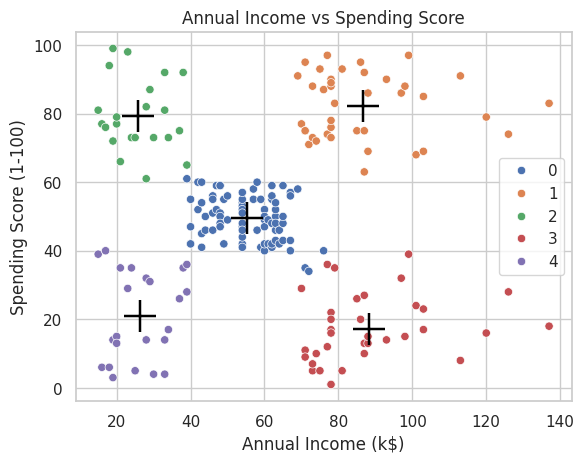

In [32]:
#Plot "Annual Income" vs "Spending Score" with final_model labels
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue=labels,palette='deep')
sns.scatterplot(
    x = centroids[:,0],
    y = centroids[: ,1],
    color = 'black',
    marker = '+',
    s = 500)
plt.xlabel("Annual Income (k$)")#x-axis denotes the Annual income
plt.ylabel("Spending Score (1-100)")#y-axis denotes the Spending Score
plt.title("Annual Income vs Spending Score");#Title of the Scatter plot Graph

In [33]:
xgb = X.groupby(final_model.labels_).mean()#Groupby used grouping the data according to categories

In [34]:
xgb

,Annual Income (k$),Spending Score (1-100)
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


# Bar chart for Count vs value of Annual income and Spending score

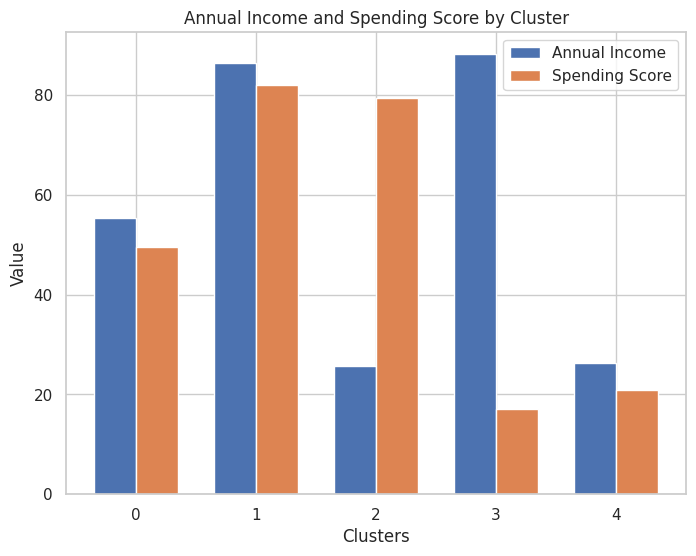

In [35]:
# Create side-by-side bar chart of `xgb`
plt.figure(figsize=(8, 6))

x = [0,1,2,3,4]
x_labels = labels
income_values = xgb['Annual Income (k$)']
spending_values = xgb['Spending Score (1-100)']

bar_width = 0.35
index = range(len(x))

# Create grouped bar plot using Matplotlib
plt.bar(index, income_values, bar_width, label='Annual Income')
plt.bar([i + bar_width for i in index], spending_values, bar_width, label='Spending Score')

# Add labels and title
plt.xlabel('Clusters')
plt.ylabel('Value')
plt.title('Annual Income and Spending Score by Cluster')
plt.xticks([i + bar_width / 2 for i in index], x)
plt.legend()

# Show the plot
plt.show()